In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [2]:
using Revise
includet("./v3.jl")
includet("./v4.jl")

In [3]:
using GLMakie
using CairoMakie

# Making reports

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 3000

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 3000

outfname = "./frep_v3_base1.pdf"


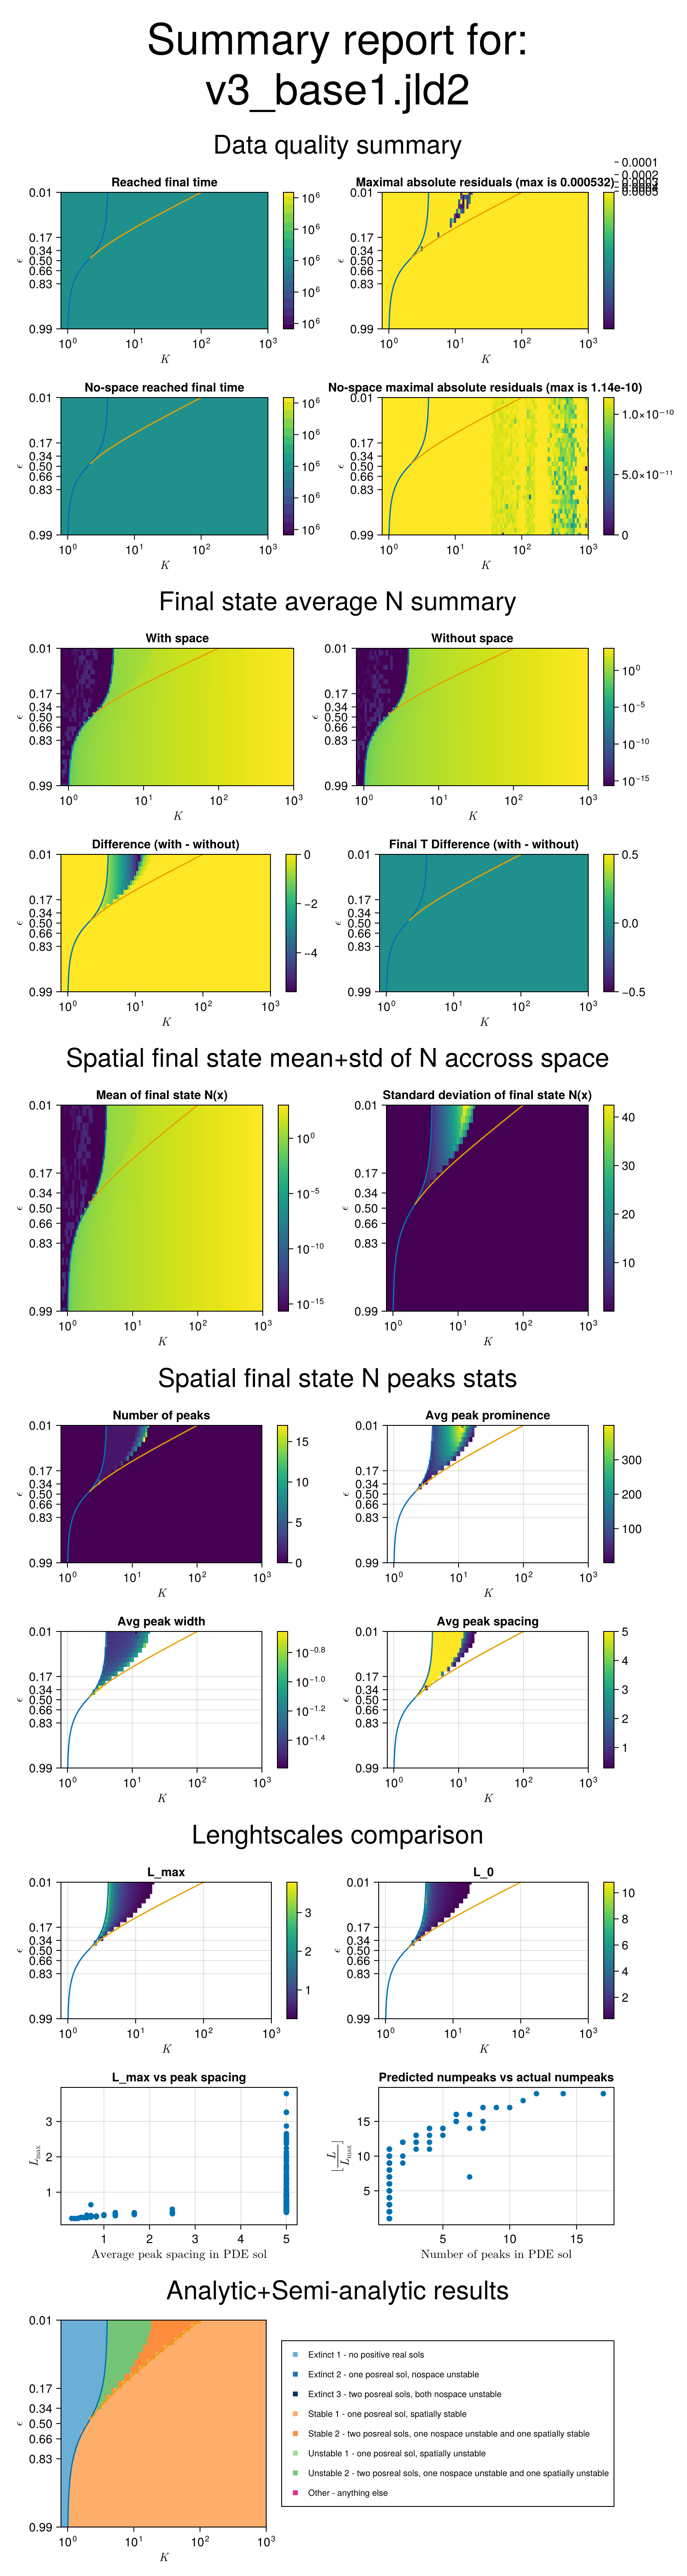

In [166]:
make_full_report_plot1("./v3_base1.jld2")

In [167]:
make_full_report_plot1("./v3_lowDR1.jld2");

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 3000

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 3000

outfname = "./frep_v3_lowDR1.pdf"


In [168]:
make_full_report_plot1("./v3_lowm_lowDR1.jld2");

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 3000

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 3000

outfname = "./frep_v3_lowm_lowDR1.pdf"


# Exploring

In [12]:
nospace_results = add_v4_nospace_run!("./v4_base1.jld2")
@show countmap(nospace_results.retcodes)

countmap(nospace_results.retcodes) = Dict{SciMLBase.ReturnCode.T, Int64}(SciMLBase.ReturnCode.Success => 3000)


Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 3000

In [13]:
f = jldopen("./v4_base1.jld2")

JLDFile /home/honza/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/mm_v2_explike/v4_base1.jld2 (read-only)
 ├─🔢 logKs
 ├─🔢 ls
 ├─🔢 T
 ├─🔢 m
 ├─🔢 c
 ├─🔢 DN
 ├─🔢 DI
 ├─🔢 DR
 ├─🔢 meanN0
 └─ ⋯ (16 more entries)

In [ ]:
f = make_full_report_plot1(f)
Makie.save("frep_v4_base1.pdf", f)
f

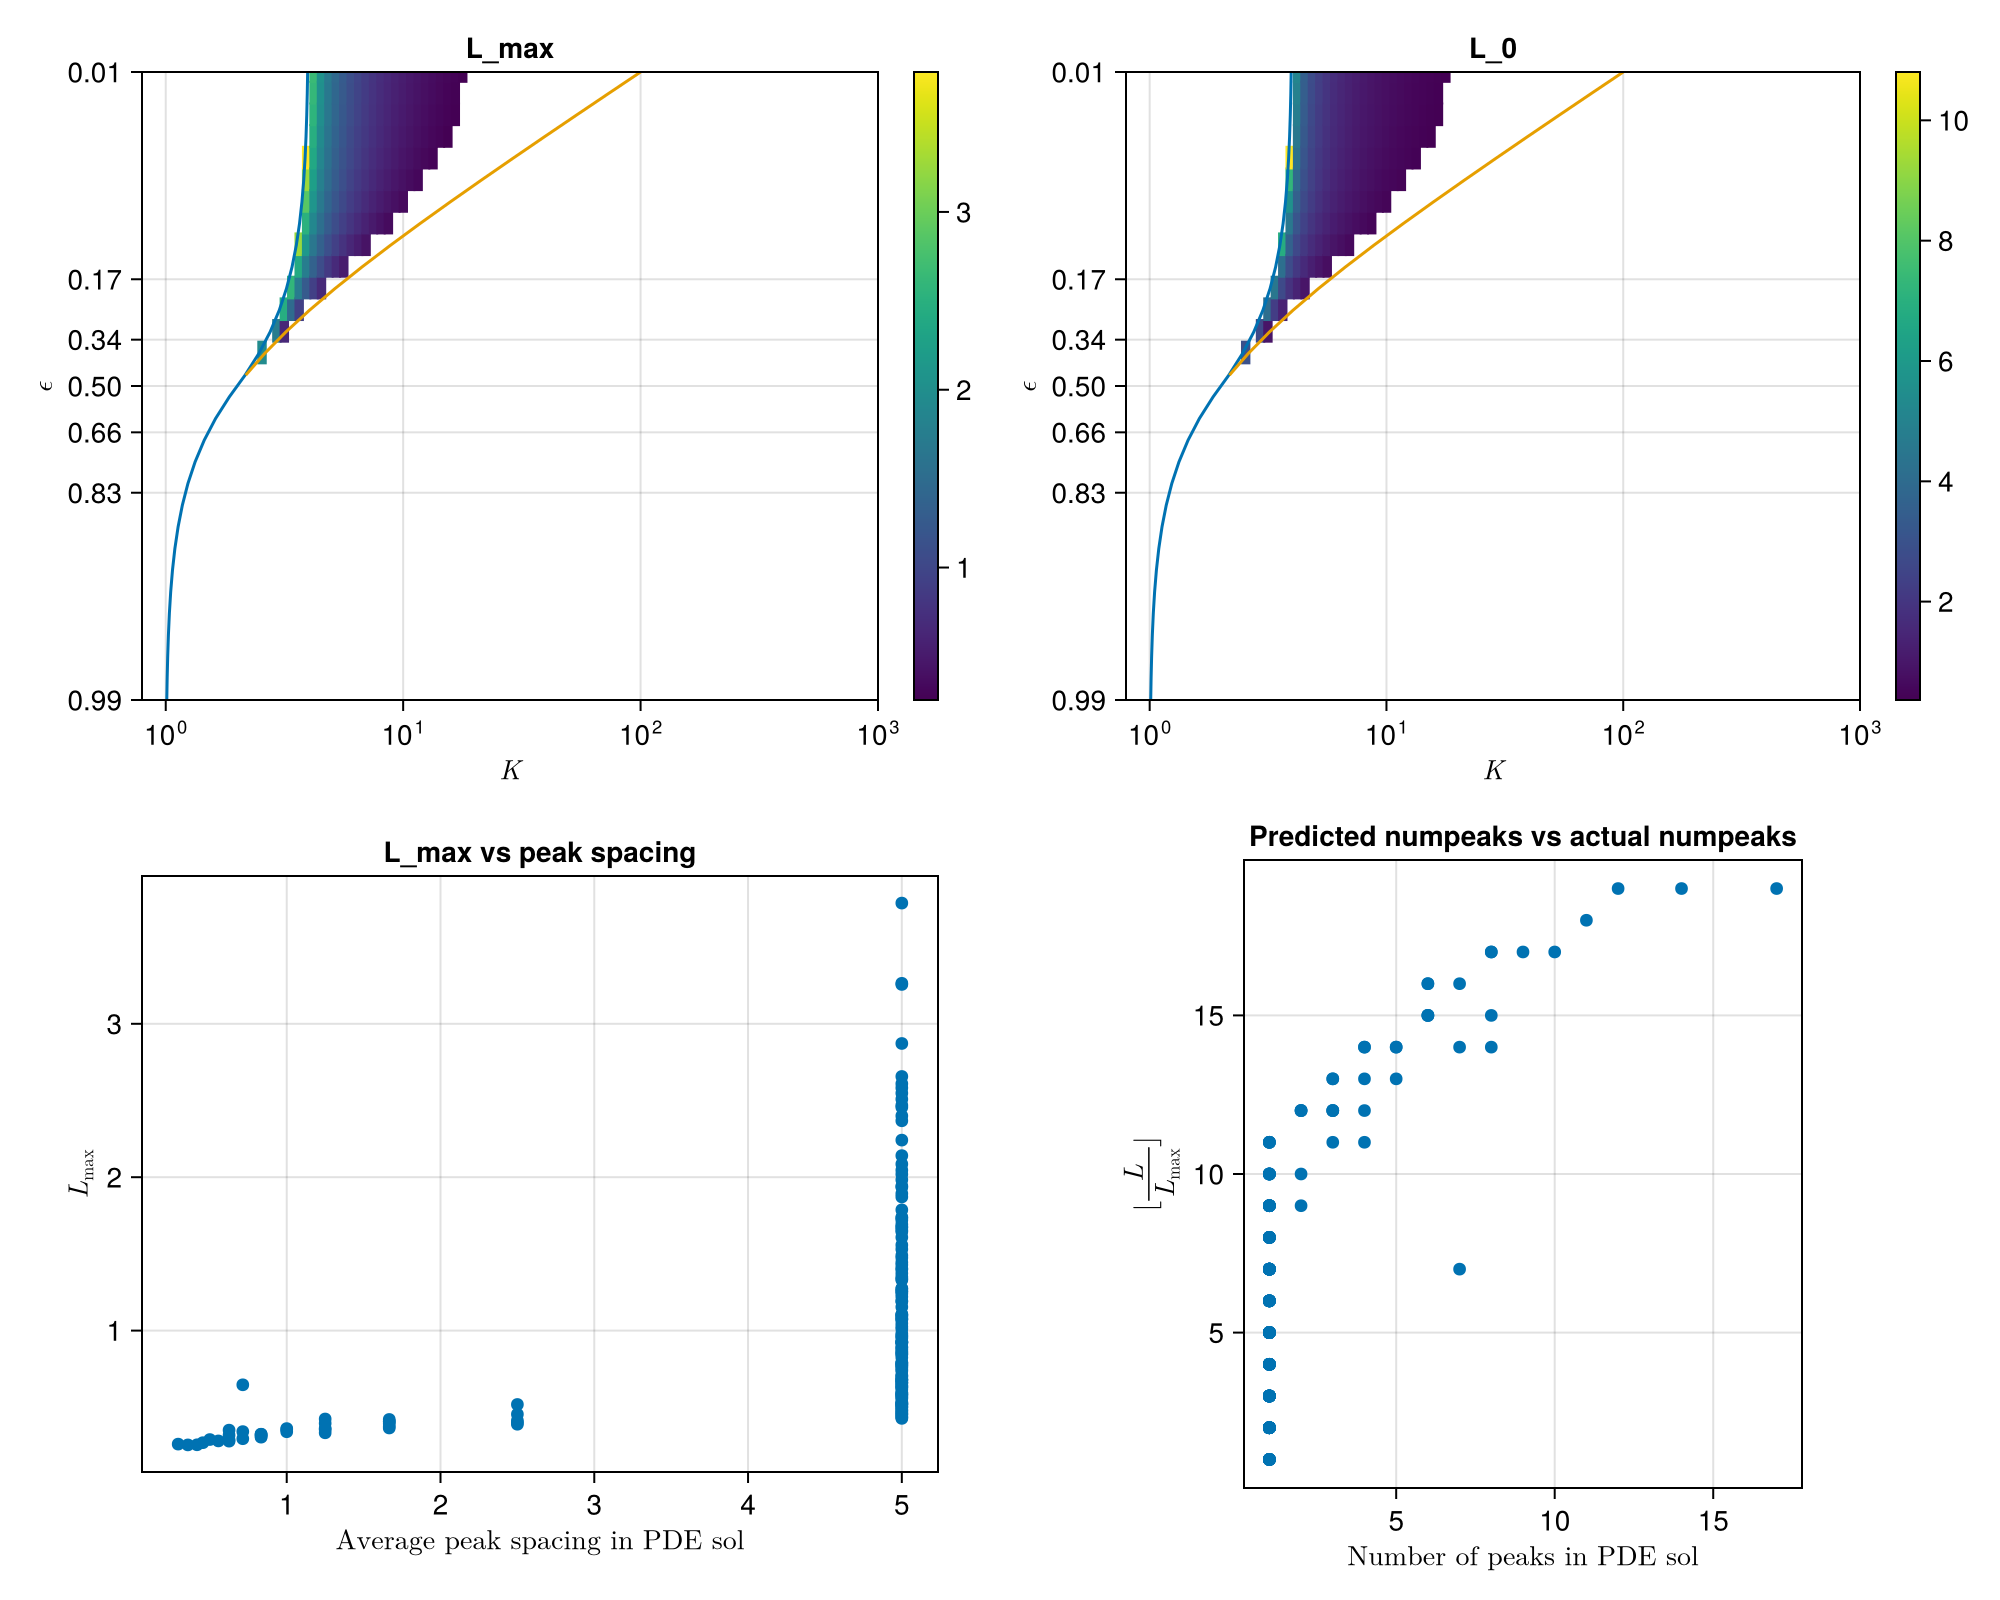

In [159]:
make_lengths_plot(f)

In [48]:
f = jldopen("./v3_base1.jld2")
logKs = f["logKs"]
ls = f["ls"]
Ks = 10. .^ logKs
leak_xs = LeakageScale.ltox.(ls)

L = f["L"]
sN = f["sN"]
c = f["c"]
m = f["m"]
r = 1.

DN = f["DN"]
DI = f["DI"]
DR = f["DR"]

fss = f["final_states"]
size(fss)

(100, 30)

##### Get peaks stuff

In [49]:
pks = get_peaks(f);

In [50]:
avg_spacing_from_numpeaks = map(pks.numpeaks) do npks
    if iszero(npks)
        missing
    else
        L / npks
    end
end;
# scatter(pks.avg_pksp[:], avg_spacing_from_numpeaks[:])

##### Get predicted lengthscales

In [51]:
L0s = map(tuple.(Ks, ls')) do (K, l)
    beta = K * c / (m * r)
    MinimalModelV2.fr_lengths_L0(beta, l, r, DI)
end
Lms = map(tuple.(Ks, ls')) do (K, l)
    beta = K * c / (m * r)
    MinimalModelV2.fr_lengths_Lmax(beta, l, r, DI)
end;

In [119]:
L0s2 = copy(L0s)
Lms2 = copy(Lms)
for ii in findall(==(0), pks.numpeaks)
    L0s2[ii] = missing
    Lms2[ii] = missing
end

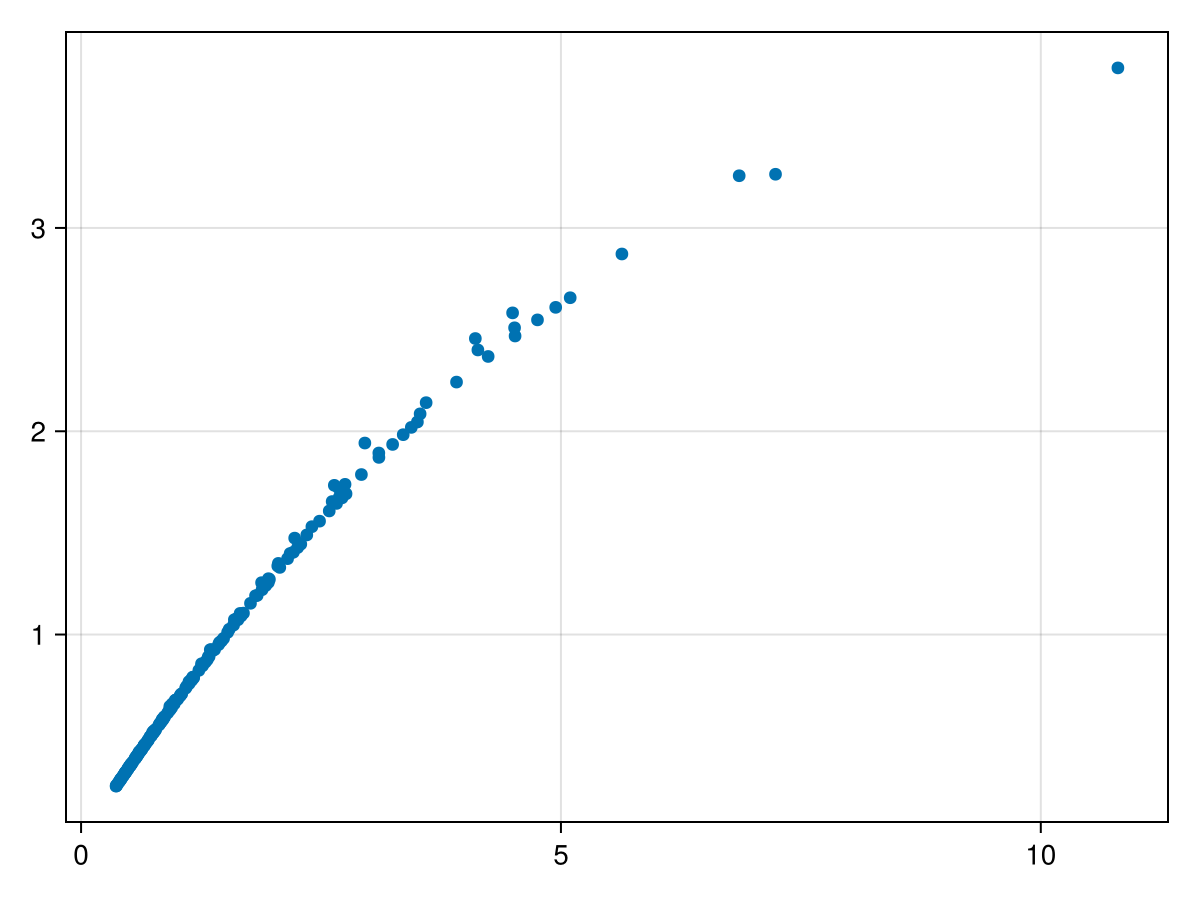

In [63]:
fap = scatter(L0s2[:], Lms2[:])
# display(GLMakie.Screen(), fap)

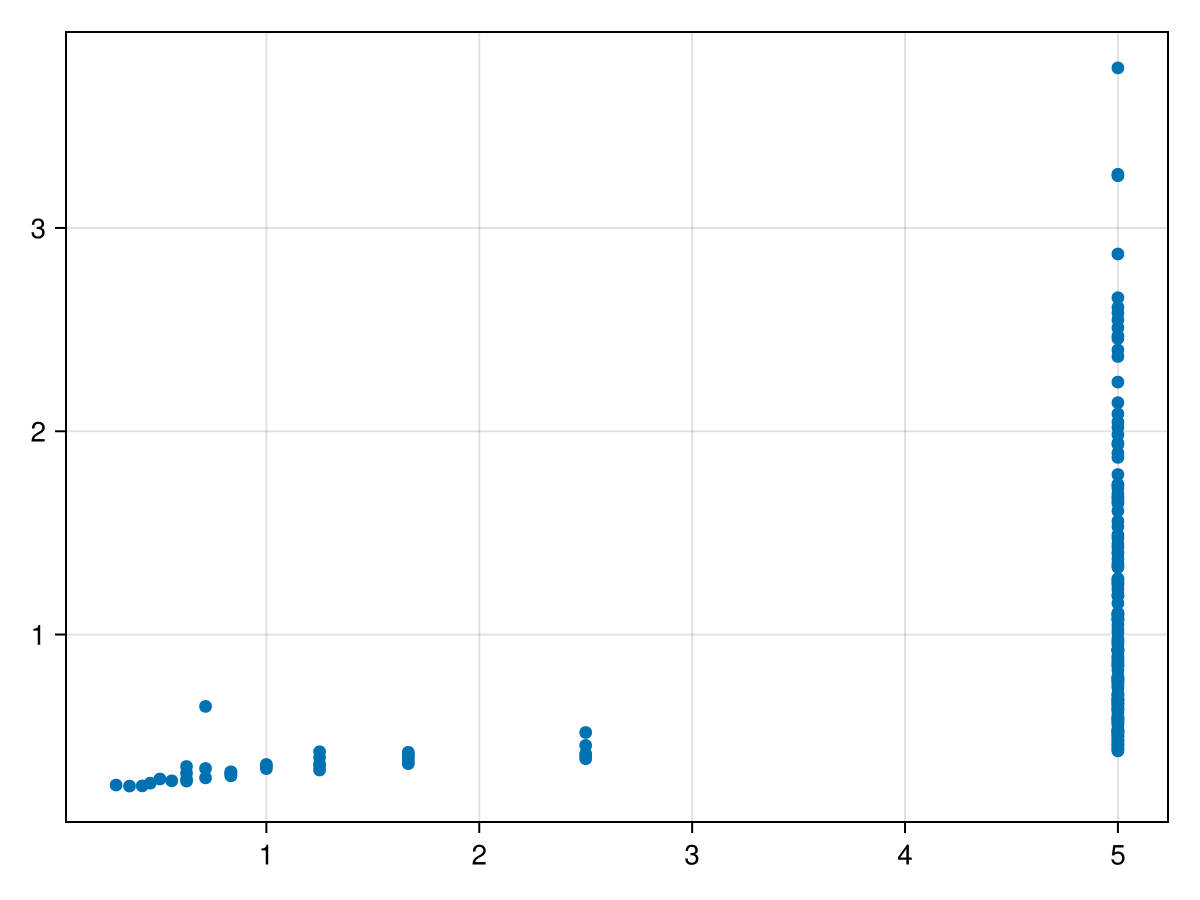

In [75]:
fap = scatter(avg_spacing_from_numpeaks[:], Lms2[:])
# display(GLMakie.Screen(), fap)

In [141]:
function sorted_cm(cm)
    ks = sort(collect(keys(cm)))
    vs = [cm[k] for k in ks]
    ks, vs
end

sorted_cm (generic function with 2 methods)

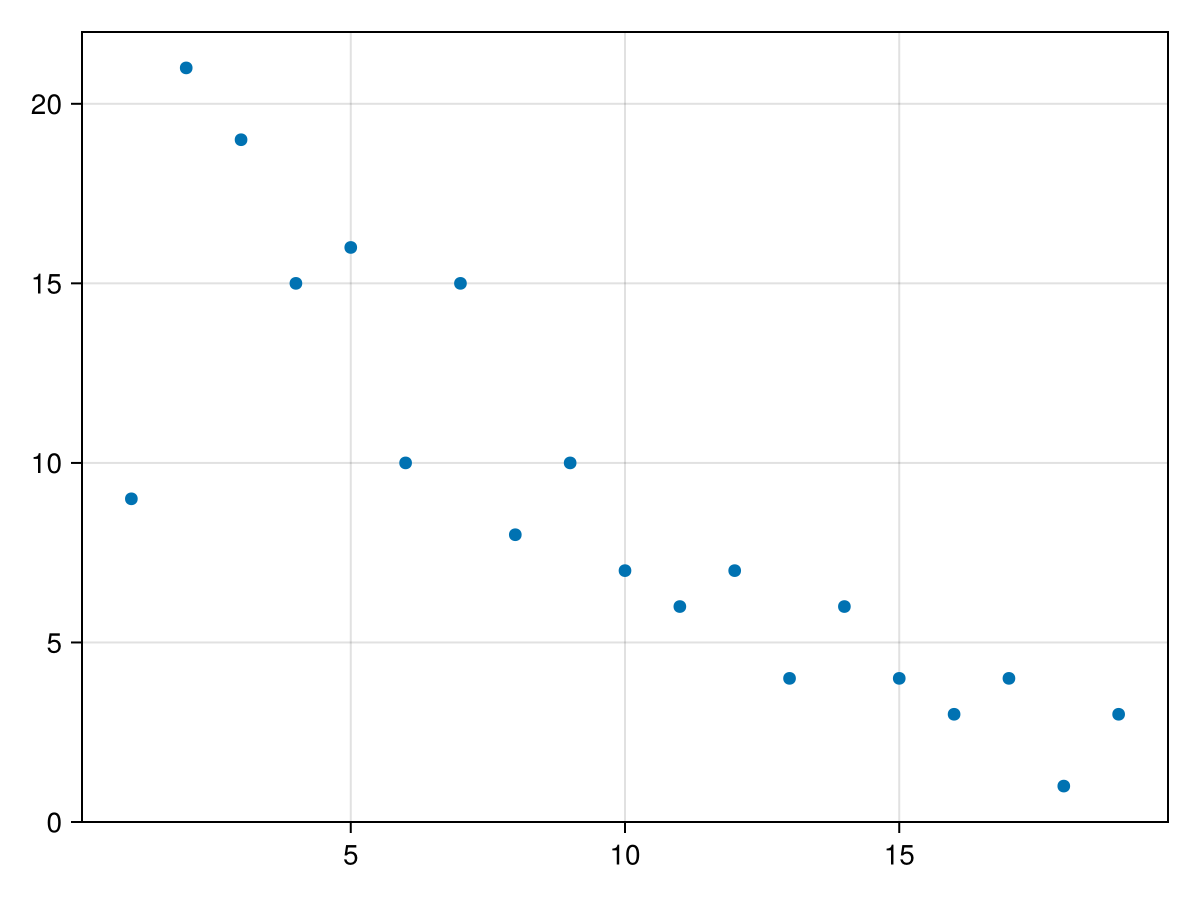

In [142]:
xx = div.(L, Lms2)
cm = countmap(xx)
scatter(sorted_cm(cm)...)

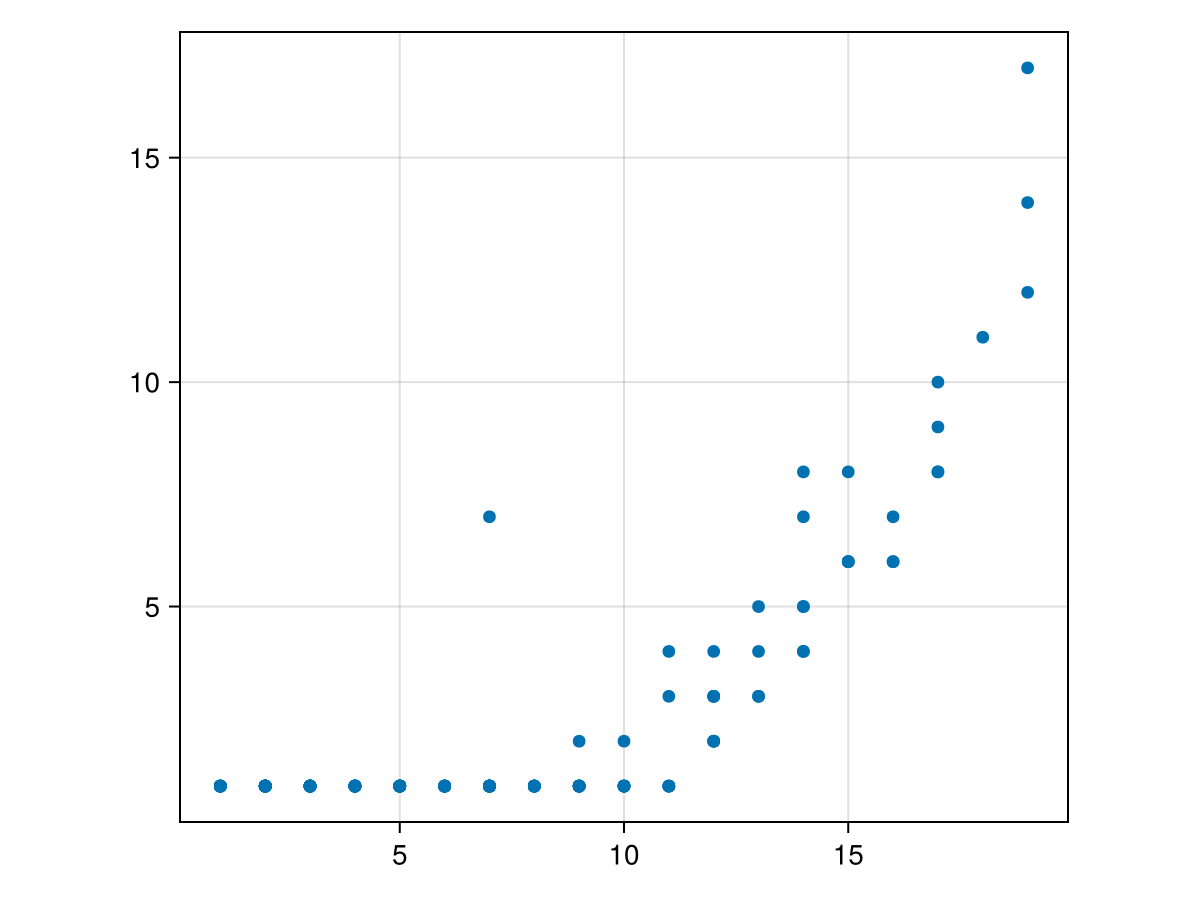

In [118]:
xs = xx[:]
ys = Float64.(pks.numpeaks[:])
# xs .+= 0.9 .* rand(length(xs))
# ys .+= 0.9 .* rand(length(xs))
fap = scatter(xs, ys;
    axis=(;
        aspect=DataAspect()
    )
)
# display(GLMakie.Screen(), fap)
fap

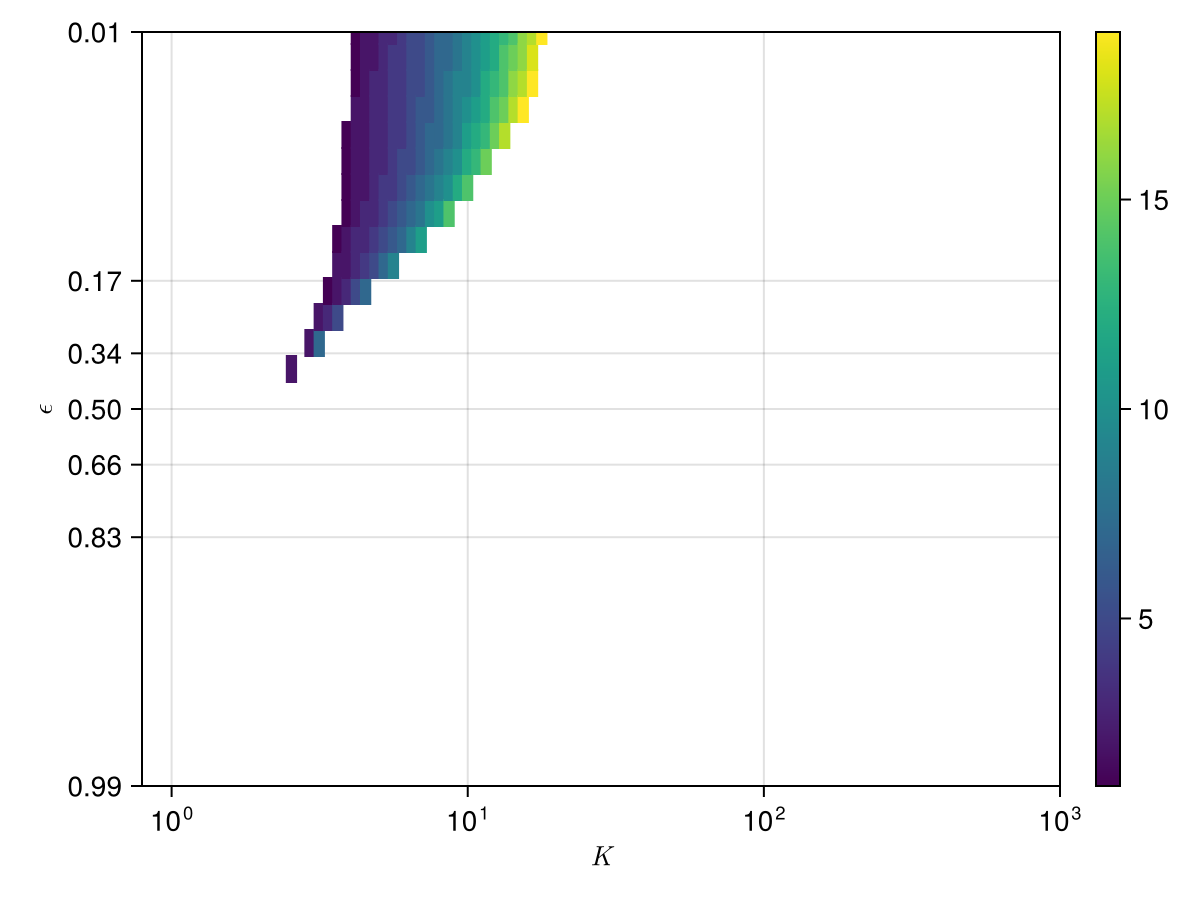

In [89]:
fig = Figure()
ax1 = MinimalModelV2.make_mm_Kl_hm_ax(fig[1, 1], logKs, ls; title="")
hm1 = heatmap!(ax1, Ks, leak_xs, xx)
Colorbar(fig[1,2], hm1)
fig